Problem Statement:

Avocado is one of the most popular fruits (my favourite), but also one of the most expensive, so this mini project aims to get insights about how the price of avocado is affected by different factors and also to predict the future of avocado prices by using machine learning.

Questions to answer:
*Which is the month and season with the highest and lowest price of avocado?
*Which region has the lowest and highest prices of Avocado?
*What is the region with the highest and lowest avocado production?
*What is the average avocado prices and volume for  year?


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\monic\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'clf', 'figure', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [159]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

In [160]:
missing_values = ["n/a", "na", "--","?"]
avocadodf=pd.read_csv('../../DATA/Avocado Prices.csv',na_values=missing_values)

## 1. Exploratory Data Analysis - EDA

In [161]:
#head
avocadodf.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [162]:
avocadodf.shape

(18249, 14)

In [163]:
#Check for Nulls
pd.isnull(avocadodf).sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [164]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [165]:
# drop the Unnamed colummn as it's not needed.
avocadodf.drop(['Unnamed: 0'], axis=1, inplace=True)
avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [166]:
avocadodf['Date']=pd.to_datetime(avocadodf['Date'])

In [167]:
avocadodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


Feature Engineering: Select month to find the season and be able to analize the behabior of price on different seasons 

In [168]:
#New columns for month, month name
Month=avocadodf['Date'].dt.month
Monthname=avocadodf['Date'].dt.month_name()
avocadodf['Month']= Month
avocadodf['MonthName']= Monthname 

In [169]:
#Create new column for season according to month
def seasoncat(month):
    winter, spring, summer, autum = ([12,1,2],[3,4,5],[6,7,8],[9,10,11])
    if month in winter:
        return 'Winter'
    elif month in spring:
        return 'Spring'
    elif month in summer:
        return 'Summer'
    else:
        return 'Autumn'

In [170]:

avocadodf['Season']= avocadodf['Month'].map(seasoncat)

In [171]:

avocadodf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,MonthName,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,December,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,December,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,December,Winter
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,June,Summer
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,November,Autumn


In [172]:
#prices according to month
monthgroup=avocadodf.groupby('MonthName')['AveragePrice'].agg(['max','min', 'mean']).sort_values('mean', ascending = True)
monthgroup

,max,min,mean
MonthName,,,
January,3.00,0.51,1.337533
December,3.05,0.49,1.345754
March,2.97,0.54,1.348275
May,2.92,0.44,1.368784
February,3.03,0.49,1.372244
April,3.17,0.51,1.384101
November,2.99,0.58,1.411204
June,3.12,0.51,1.425375
July,2.75,0.52,1.436318


In [173]:
seasongroup=avocadodf.groupby('Season')['AveragePrice'].agg(['max','min', 'mean']).sort_values('mean', ascending = True)
seasongroup

,max,min,mean
Season,,,
Winter,3.05,0.49,1.350404
Spring,3.17,0.44,1.366257
Summer,3.12,0.51,1.445006
Autumn,3.25,0.56,1.472796


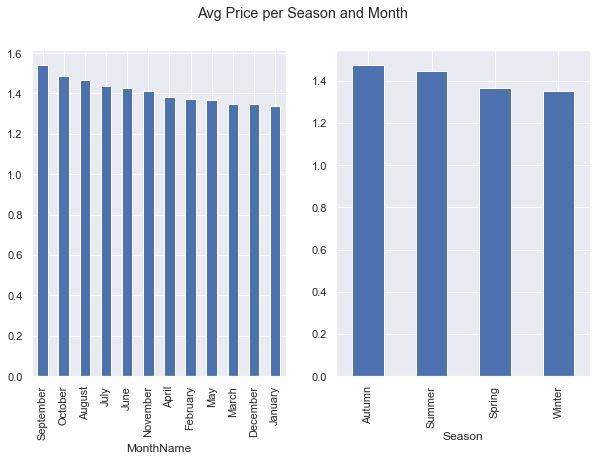

In [174]:
visualmonth = avocadodf.groupby('MonthName')['AveragePrice'].mean().sort_values(ascending=False)
visualseason = avocadodf.groupby('Season')['AveragePrice'].mean().sort_values(ascending=False)
f,ax = plt.subplots(1,2)
f.suptitle('Avg Price per Season and Month')
visualmonth.plot(kind='bar', ax=ax[0])
visualseason.plot(kind='bar', ax=ax[1])

 Autumn is the season with the highest price of avocado and September is the month with the highest price.

In [175]:
Avg_volumeregion= avocadodf.groupby('region')['Total Volume'].mean()
dfavg_volumeregion= pd.DataFrame(Avg_volumeregion).reset_index()
dfavg_volumeregion = pd.DataFrame(dfavg_volumeregion.sort_values(by ='Total Volume',ascending=False))
dfavg_volumeregion.head(6)

,region,Total Volume
51,TotalUS,1.735130e+07
52,West,3.215323e+06
6,California,3.044324e+06
45,SouthCentral,2.991952e+06
29,Northeast,2.110299e+06
46,Southeast,1.820232e+06


In [176]:
cat=avocadodf.type.unique()
cat

array(['conventional', 'organic'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

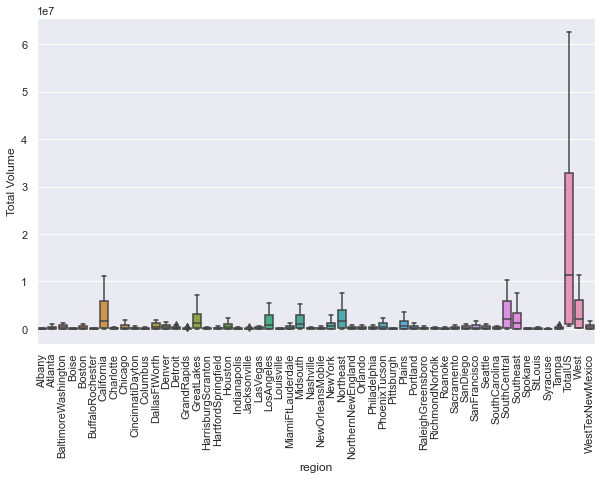

In [177]:
sns.boxplot(x='region', y = 'Total Volume', data= avocadodf)
plt.xticks(rotation=90)

TotalUS is an outlier so it'll be removed

In [178]:
#Remove TotalUS
visualvolume=dfavg_volumeregion[~dfavg_volumeregion['region'].str.contains('TotalUS')]


Text(0.5, 1.0, 'total volume by Region')

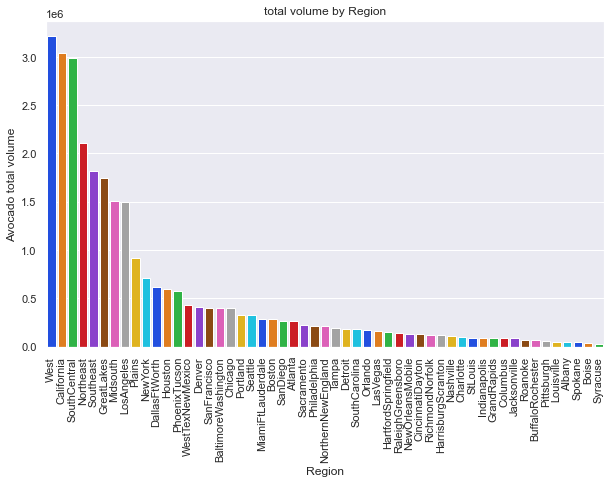

In [22]:
sns.barplot(x= 'region', y='Total Volume', data = visualvolume, palette='bright' )
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Avocado total volume')
plt.title('total volume by Region')

In [23]:
Avg_region= avocadodf.groupby('region')['AveragePrice'].mean()
dfavg_region= pd.DataFrame(Avg_region)
dfavg_region = pd.DataFrame(dfavg_region.AveragePrice.sort_values(ascending=False))
dfavg_region.head()

,AveragePrice
region,
HartfordSpringfield,1.818639
SanFrancisco,1.804201
NewYork,1.727574
Philadelphia,1.632130
Sacramento,1.621568


Text(0.5, 1.0, 'Average price by Region')

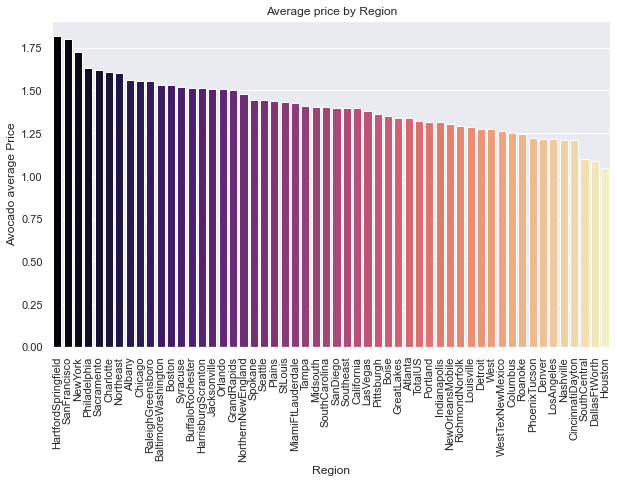

In [24]:
sns.barplot(x= dfavg_region.index, y='AveragePrice', data = dfavg_region, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Avocado average Price')
plt.title('Average price by Region')

Hartford Springfield is the region with the highest price for avocado and Houston offers cheaper avocados.

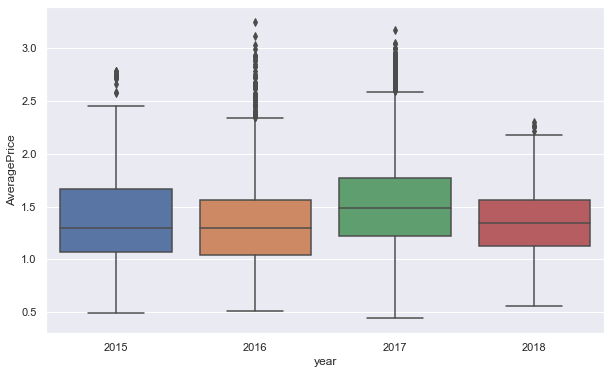

In [26]:
ax = sns.boxplot(x='year', y = 'AveragePrice', data= avocadodf)
#ax= sns.swarmplot(x='year', y = 'AveragePrice', data= avocadodf)

In [27]:
Avg_priceyear= avocadodf.groupby('year')['AveragePrice'].mean()
df_Avg_priceyear= pd.DataFrame(Avg_priceyear)
df_Avg_priceyear
#df_Avg_priceyear = pd.DataFrame(dfavg_region.AveragePrice.sort_values(ascending=False))

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


In [28]:
avocadodf.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [29]:
Avg_volumeyear= avocadodf.groupby('year')['Total Volume'].mean()
df_Avg_volumeyear=pd.DataFrame(Avg_volumeyear)
df_Avg_volumeyear

,Total Volume
year,
2015,7.810274e+05
2016,8.584206e+05
2017,8.623393e+05
2018,1.066928e+06


Text(0.5, 1.0, 'Average price by year')

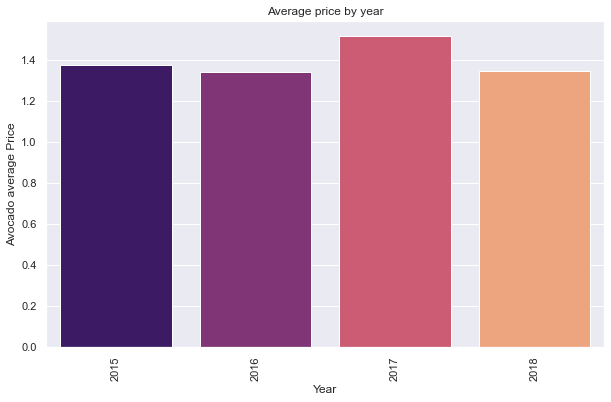

In [30]:
sns.barplot(x= df_Avg_priceyear.index, y='AveragePrice', data = df_Avg_priceyear, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Avocado average Price')
plt.title('Average price by year')

Text(0.5, 1.0, 'Average volume by year')

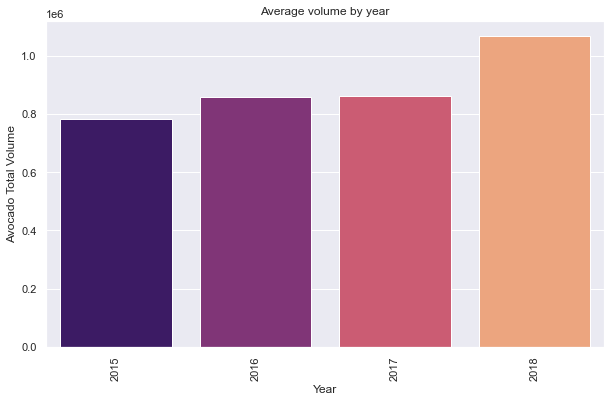

In [31]:
sns.barplot(x= df_Avg_volumeyear.index, y='Total Volume', data = df_Avg_volumeyear, palette='magma' )
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Avocado Total Volume')
plt.title('Average volume by year')

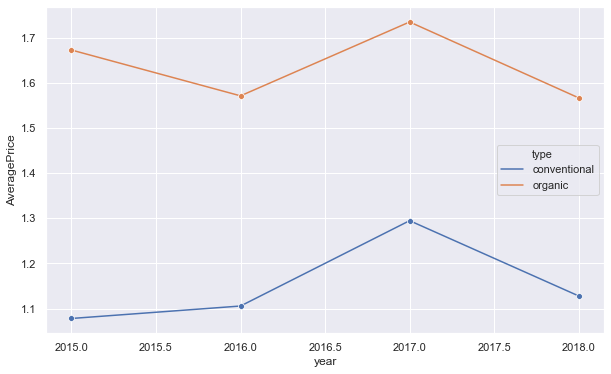

In [32]:
sns.lineplot(x='year', y='AveragePrice', hue='type' ,marker='o', ci=None, data= avocadodf)

In [33]:
x = avocadodf['AveragePrice'].value_counts(bins=10)
x

(1.002, 1.283]    4824
(1.283, 1.564]    4506
(1.564, 1.845]    3412
(0.721, 1.002]    2632
(1.845, 2.126]    1672
(2.126, 2.407]     598
(0.436, 0.721]     331
(2.407, 2.688]     177
(2.688, 2.969]      86
(2.969, 3.25]       11
Name: AveragePrice, dtype: int64

Text(0.5, 1.0, 'Distribution of Average Price')

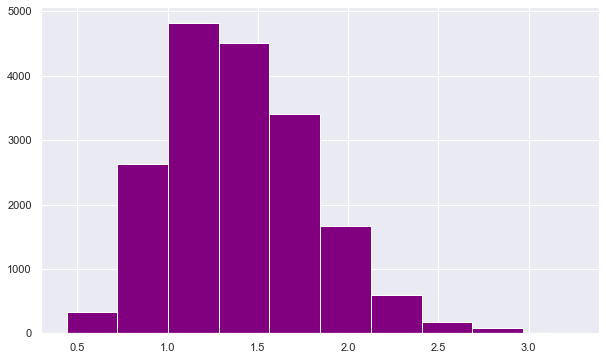

In [34]:
plt.hist(avocadodf['AveragePrice'], facecolor = 'purple')
ax.set_title('Distribution of Average Price')

The volume of avocado has increased over the years and the price has remained between $1 and $1.5 

In [35]:
avocado_corr=avocadodf.corr()
avocado_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.015344
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.014522
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.015892
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.006182
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.098812


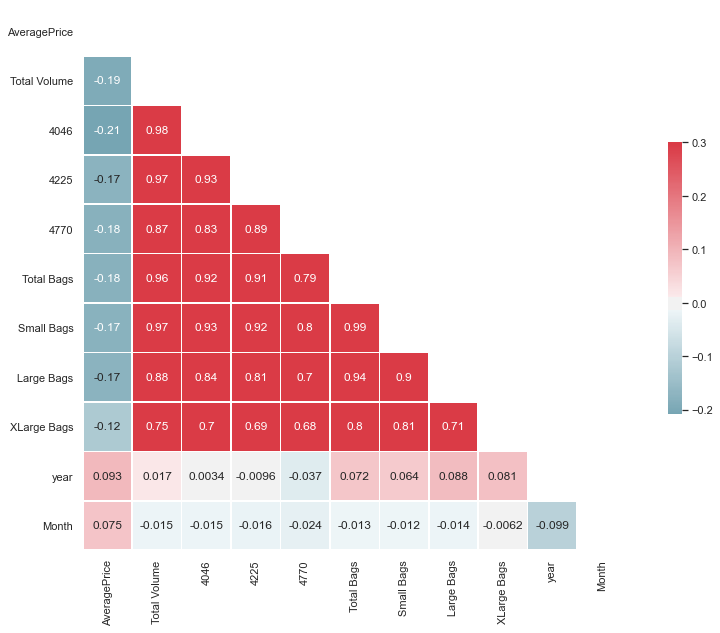

In [45]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(avocado_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(avocado_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [180]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')


    plt.show();

In [181]:
avocadodf['Total Volume'].value_counts(bins=5)

(-62421.003, 12501196.952]      18080
(25002309.344, 37503421.736]      123
(37503421.736, 50004534.128]       32
(12501196.952, 25002309.344]       11
(50004534.128, 62505646.52]         3
Name: Total Volume, dtype: int64

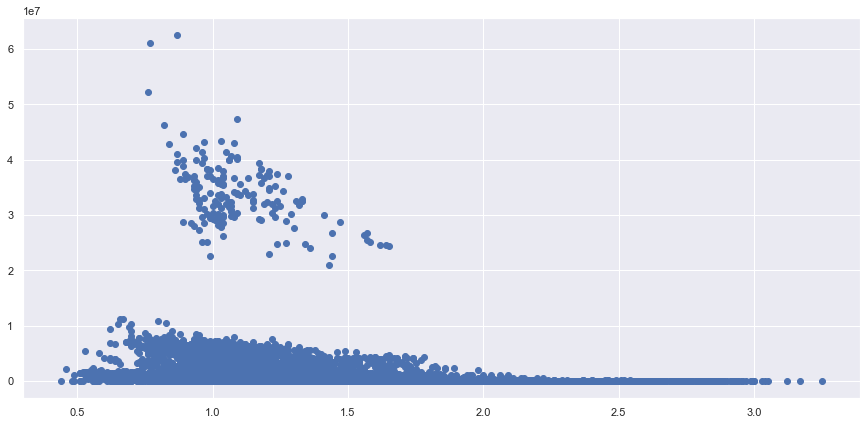

In [182]:
draw_scatter_plot(avocadodf['AveragePrice'],avocadodf['Total Volume'])

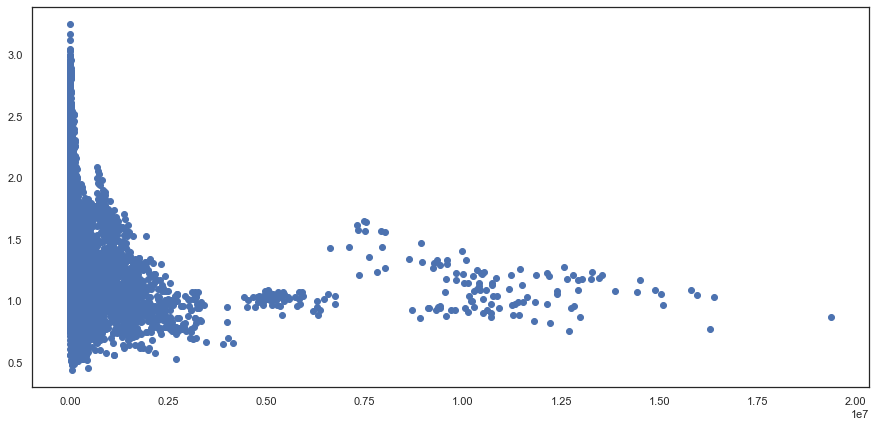

In [52]:
draw_scatter_plot(avocadodf['Total Bags'], avocadodf['AveragePrice'])


## Categorical features

In [36]:
df_copy=avocadodf.copy()

In [37]:
df_copy.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'MonthName', 'Season'],
      dtype='object')

In [38]:
df_copy = pd.get_dummies(df_copy, columns= ['type', 'region', 'year', 'Season'], drop_first=True)

In [39]:
df_copy.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Month',
       'MonthName', 'type_organic', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh

In [40]:
df_corr2=df_copy.corr()
df_corr2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month,...,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,year_2016,year_2017,year_2018,Season_Spring,Season_Summer,Season_Winter
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.075134,...,0.000978,-0.029665,-0.045633,-0.048998,-0.111502,0.183200,-0.040133,-0.059432,0.053952,-0.081894
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.015344,...,-0.026069,0.656367,0.094063,-0.016601,0.001501,0.002289,0.017316,0.012315,0.000420,0.001662
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.014522,...,-0.020335,0.628425,0.096246,-0.004544,-0.011301,-0.002293,0.013621,0.013980,0.003153,-0.000530
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.015892,...,-0.030055,0.646471,0.067844,-0.026002,0.001493,-0.014139,0.004472,0.008936,0.001959,0.002355
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.024220,...,-0.029050,0.561470,0.047791,-0.017785,0.034925,-0.043384,-0.013237,0.018028,0.004986,0.001128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year_2017,0.183200,0.002289,-0.002293,-0.014139,-0.043384,0.032944,0.028562,0.042807,0.041539,0.037080,...,0.000017,0.000017,0.000017,-0.000915,-0.450620,1.000000,-0.186866,-0.003169,-0.016565,0.034990
year_2018,-0.040133,0.017316,0.013621,0.004472,-0.013237,0.039147,0.035630,0.046490,0.038402,-0.173049,...,-0.000006,-0.000006,-0.000006,0.000332,-0.184348,-0.186866,1.000000,0.041919,-0.099691,0.098454
Season_Spring,-0.059432,0.012315,0.013980,0.008936,0.018028,0.012319,0.012203,0.011849,0.008632,-0.409364,...,-0.000014,-0.000014,-0.000014,0.000724,0.004397,-0.003169,0.041919,1.000000,-0.335373,-0.357490
Season_Summer,0.053952,0.000420,0.003153,0.001959,0.004986,-0.005510,-0.003343,-0.013880,0.025235,0.111002,...,0.000041,0.000041,0.000041,-0.002159,0.021085,-0.016565,-0.099691,-0.335373,1.000000,-0.330296


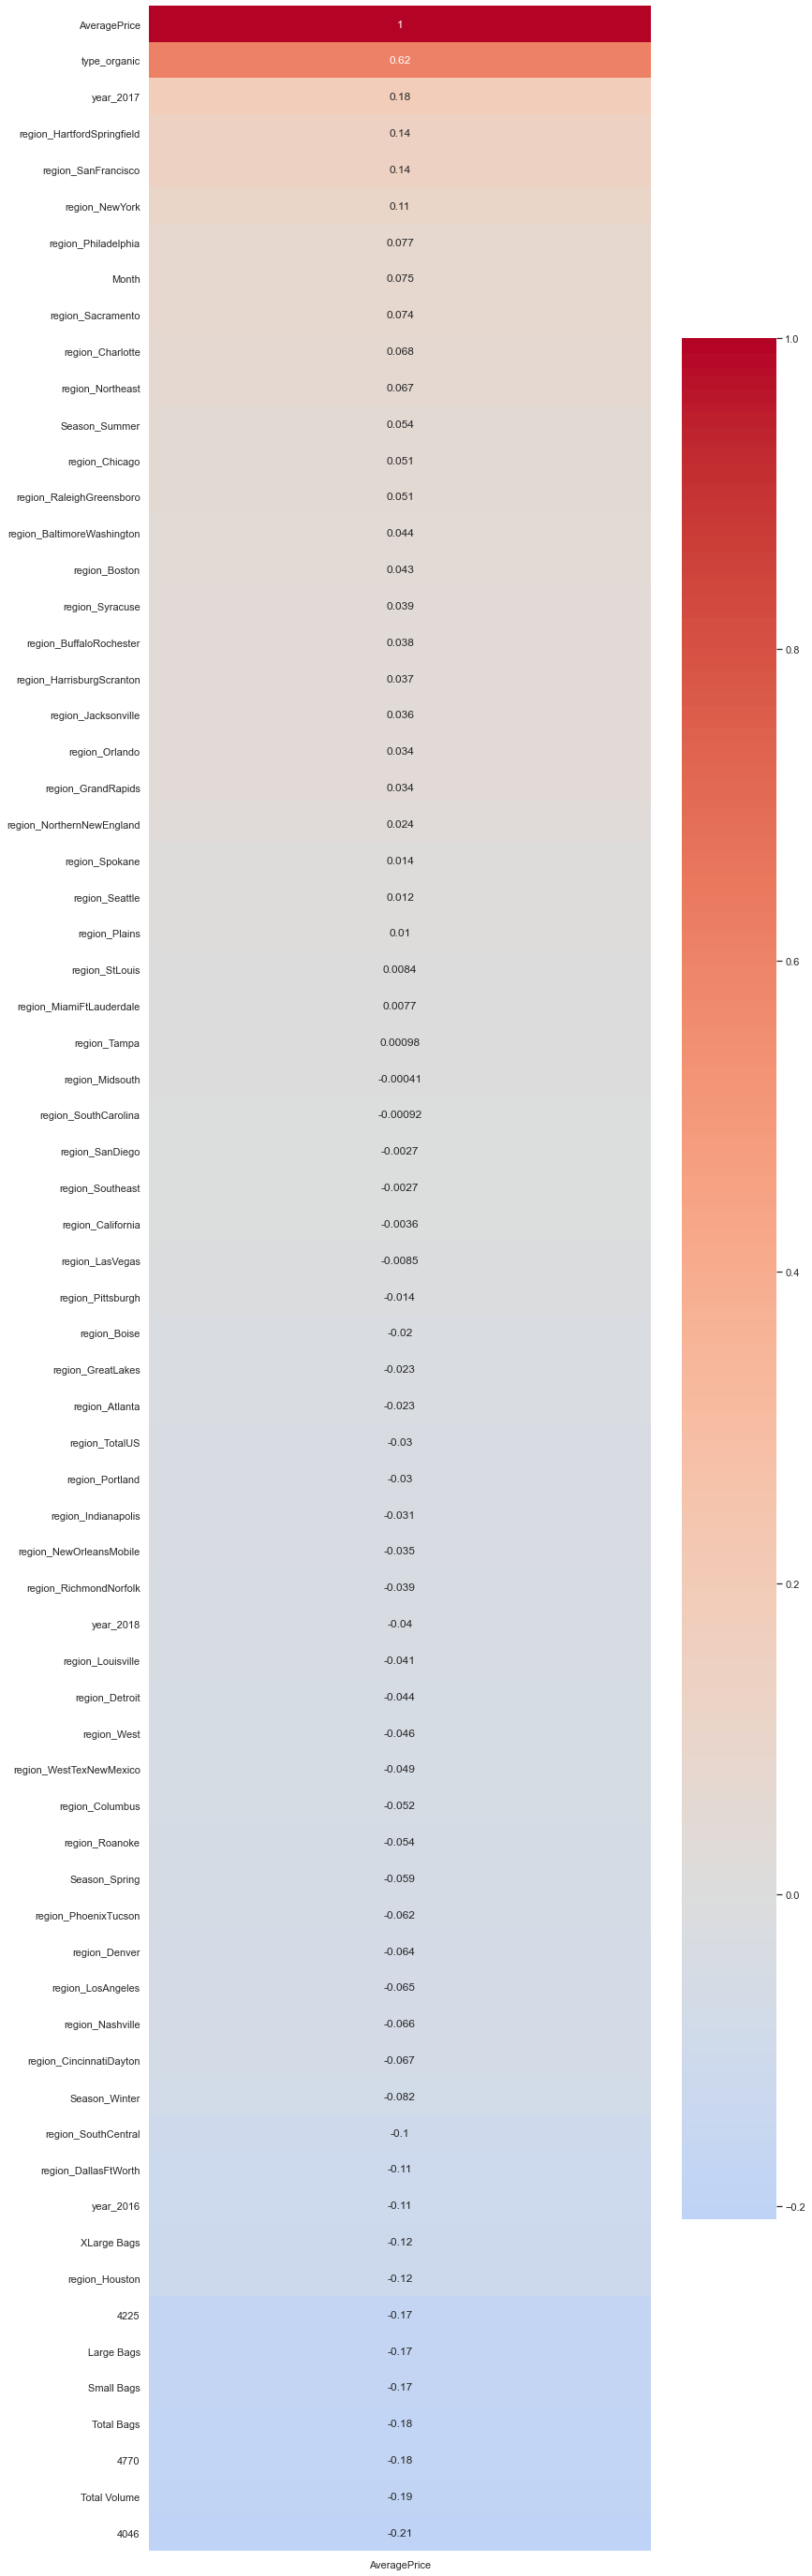

In [112]:
figure = plt.figure(figsize=(12,50))
sns.heatmap(df_corr2[['AveragePrice']].sort_values('AveragePrice',ascending=False),annot=True, cmap='coolwarm', center=0)

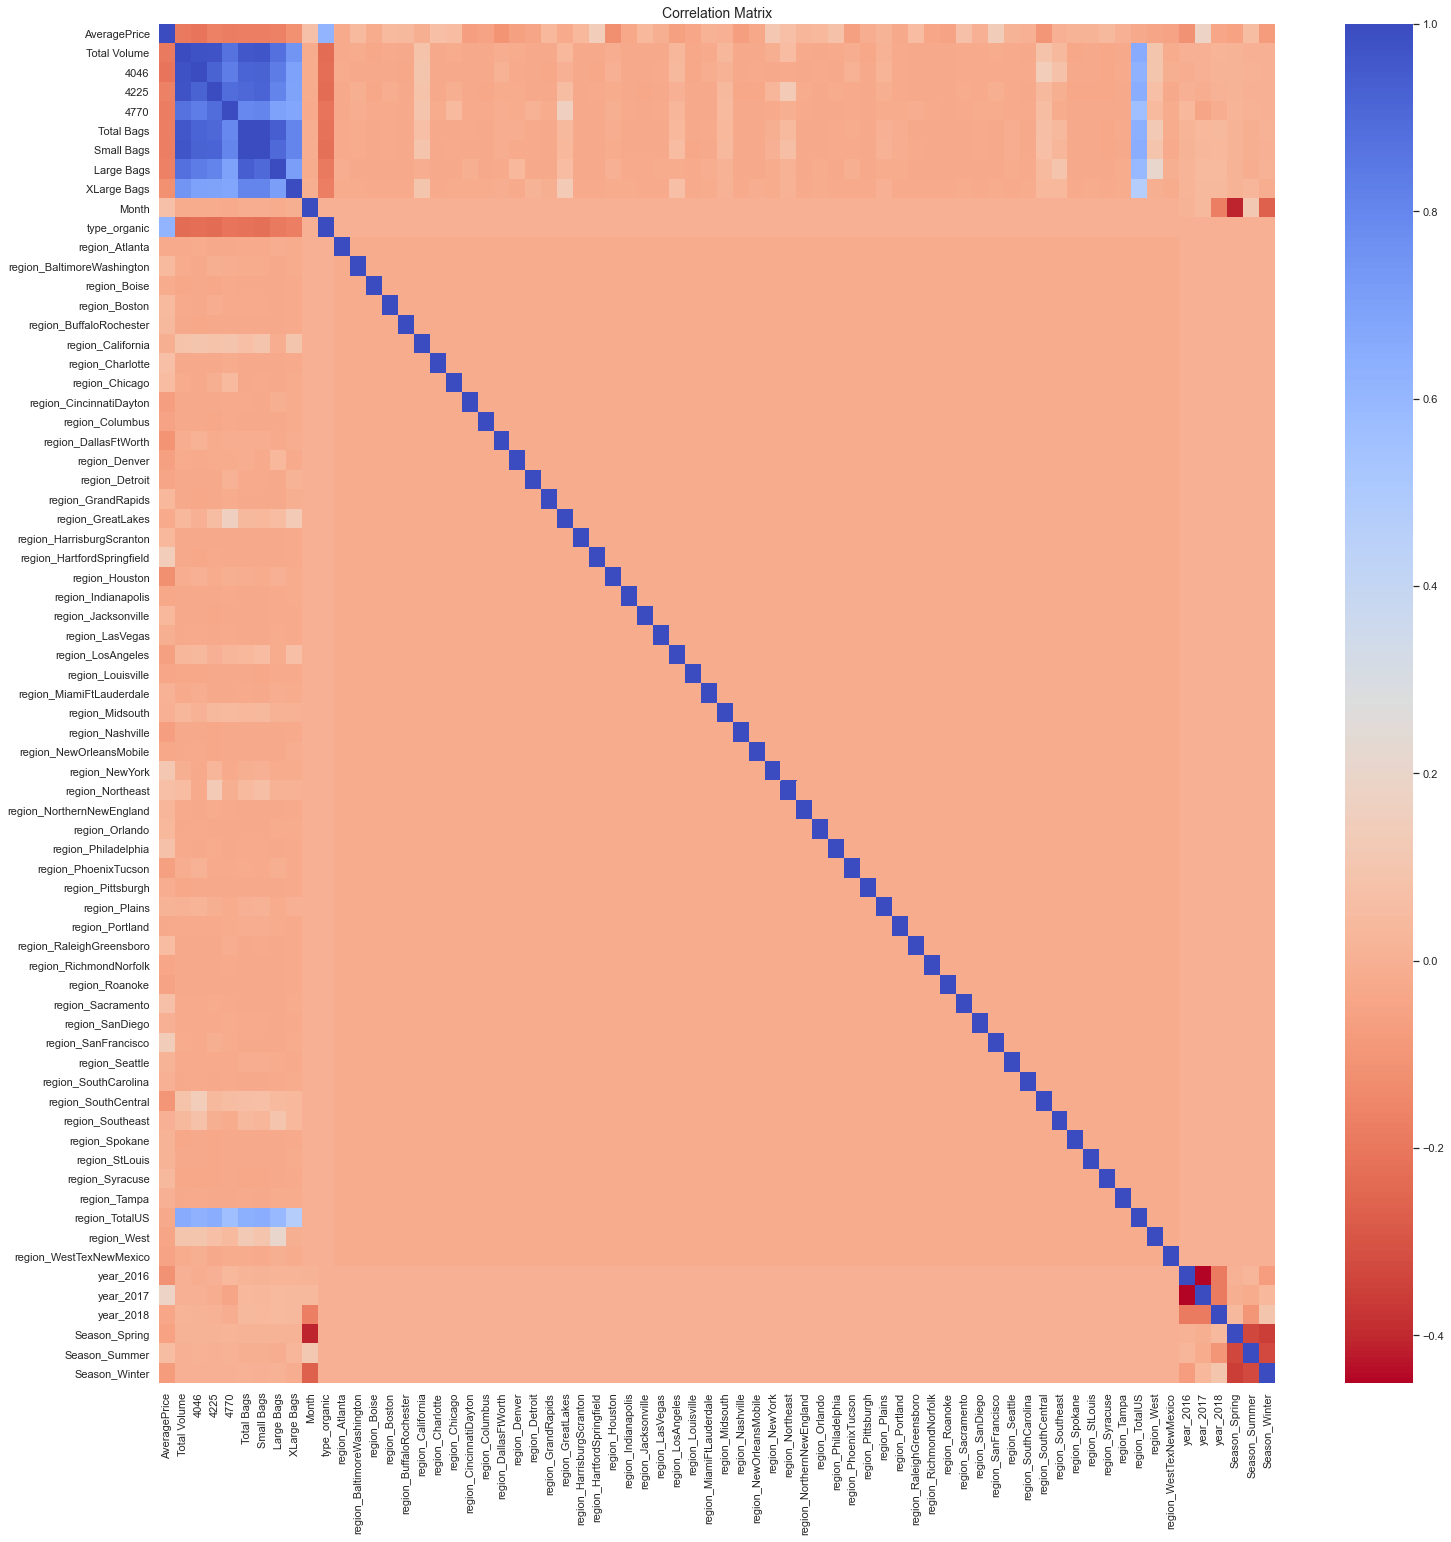

In [45]:
f, ax = plt.subplots(1, 1, figsize=(25,25))
sns.heatmap(df_corr2, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

## Set Target Variable

In [49]:
#target variable is price of avocado
y=df_copy['AveragePrice']

In [50]:
y.head()
y.shape

(18249,)

## Set predictor variable

In [51]:
#check correlation and chose the featuress which are more correlated with my target price
df_copy.corr()['AveragePrice'].sort_values(ascending=False).head(10)

AveragePrice                  1.000000
type_organic                  0.615845
year_2017                     0.183200
region_HartfordSpringfield    0.140782
region_SanFrancisco           0.135856
region_NewYork                0.109714
region_Philadelphia           0.077153
Month                         0.075134
region_Sacramento             0.073550
region_Charlotte              0.068251
Name: AveragePrice, dtype: float64

In [52]:
df_copy.corr()['AveragePrice'].sort_values(ascending=True).head(10)

4046             -0.208317
Total Volume     -0.192752
4770             -0.179446
Total Bags       -0.177088
Small Bags       -0.174730
Large Bags       -0.172940
4225             -0.172928
region_Houston   -0.122151
XLarge Bags      -0.117592
year_2016        -0.111502
Name: AveragePrice, dtype: float64

In [54]:
#Set predictor variable
#drop columns in X not needed
X = df_copy.drop(['AveragePrice','Date','Month','MonthName'], axis=1)


In [58]:
X.head()
print(X.shape)
X.columns

(18249, 68)


Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       'region_Plains', 'region_Portland', 'region

## Regression

## 2.1. Using linear regresion to create a model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [61]:
# Build and fit the model
lr=LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [62]:
print(lr.coef_, lr.intercept_)

[-2.14594360e-06  2.14315228e-06  2.12841998e-06  2.21228935e-06
 -4.03189043e-02  4.03210606e-02  4.03209880e-02  4.03222184e-02
  4.94124885e-01 -2.16891766e-01 -3.18539982e-02 -1.86963958e-01
 -4.71662727e-02 -4.30774201e-02 -1.73377381e-01  4.27114751e-02
  6.66289455e-03 -3.54175927e-01 -3.12119749e-01 -4.79535594e-01
 -3.17254283e-01 -2.93945978e-01 -5.42521163e-02 -2.51702768e-01
 -4.86734886e-02  2.46426513e-01 -5.05631624e-01 -2.46417125e-01
 -4.43554102e-02 -1.77072161e-01 -3.58708956e-01 -2.81458477e-01
 -1.36744927e-01 -1.59858310e-01 -3.34633209e-01 -2.55311848e-01
  1.73151444e-01  6.09215176e-02 -8.32932419e-02 -4.43883631e-02
  8.21171288e-02 -3.25716562e-01 -1.93842832e-01 -1.28105602e-01
 -2.48681018e-01 -5.44739025e-03 -2.80732685e-01 -3.10402784e-01
  5.99487639e-02 -1.51632210e-01  2.27169819e-01 -1.40289606e-01
 -1.54281467e-01 -4.69591655e-01 -1.54494881e-01 -1.33402104e-01
 -1.31310190e-01 -3.99216171e-02 -1.43468764e-01 -2.11149151e-01
 -2.64027376e-01 -2.90775

In [63]:
lr_coefdf =pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coefdf.sort_values(by = 'coefficient',ascending=False).head(10)

,feature,coefficient
8,type_organic,0.494125
25,region_HartfordSpringfield,0.246427
50,region_SanFrancisco,0.227170
36,region_NewYork,0.173151
63,year_2017,0.136667
40,region_Philadelphia,0.082117
37,region_Northeast,0.060922
48,region_Sacramento,0.059949
15,region_Charlotte,0.042711
7,XLarge Bags,0.040322


#### Evaluete coefficients

In [64]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': lr.coef_,
                                'abs_coef': np.abs(lr.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)
    plt.xticks(rotation=90)

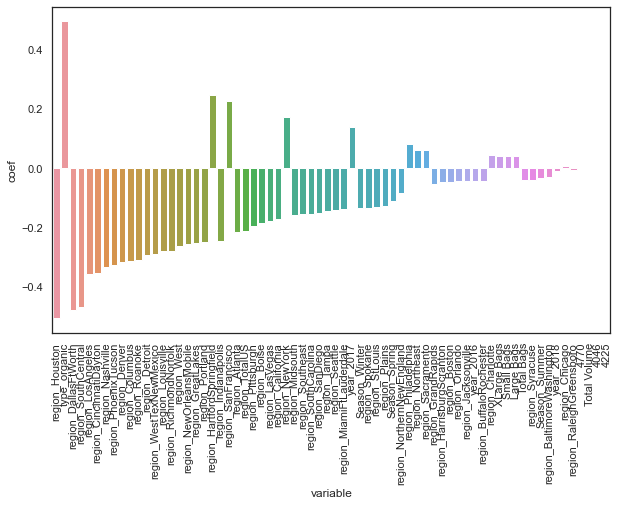

In [65]:
view_coeff(X, lr)

In [66]:
#y_train.shape
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)
#print(y_trainpreds.shape)

(12774, 68)
(12774,)
(5475,)
(5475, 68)


## Predictions using Linear Regression

In [67]:
#predictions from lr - training data
y_trainpreds = lr.predict(X_train)
print(y_trainpreds[:10])
print(y_trainpreds.shape)

[0.70210958 1.14994886 1.18590889 1.07301998 1.45265903 1.04837609
 1.28232394 1.56570549 1.21821521 1.30913652]
(12774,)


In [68]:
#predictions from lr - testing data
y_testpreds = lr.predict(X_test)
print(y_testpreds[:10])
print(y_testpreds.shape)

[1.03919    1.07809152 1.53333849 1.02680071 1.66285541 1.39595411
 1.77402323 0.81845561 1.82362804 1.31059481]
(5475,)


## Evaluation of Model

In [69]:
# Ploting of model of difference betwwen actual and predicted for trining data to evaluate rsquare
train_plot = pd.DataFrame({'Y_Actual':y_train, 'Y_predict':y_trainpreds}, columns=['Y_Actual','Y_predict'])
train_plot.head()

,Y_Actual,Y_predict
8704,0.95,0.702110
5271,1.14,1.149949
7654,1.17,1.185909
2417,0.99,1.073020
11906,1.58,1.452659


In [70]:
# Ploting of model of difference betwwen actual and predicted for testing data
test_plot = pd.DataFrame({'Y_Actual':y_test, 'Y_predict':y_testpreds}, columns=['Y_Actual','Y_predict'])
test_plot.head()

,Y_Actual,Y_predict
8604,0.82,1.039190
2608,0.97,1.078092
14581,1.44,1.533338
4254,0.97,1.026801
16588,1.45,1.662855


Text(0.5, 1.0, 'Testing data')

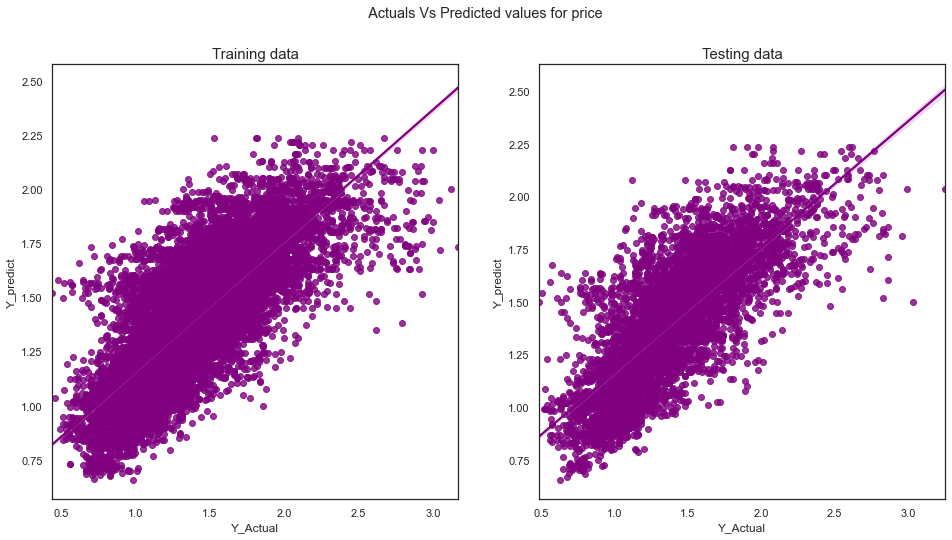

In [71]:
#visual
f,(ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
sns.regplot(x='Y_Actual', y= 'Y_predict', data= train_plot, ax=ax1, color='purple')
sns.regplot(x='Y_Actual', y= 'Y_predict', data= test_plot, ax=ax2, color='purple')
f.suptitle(' Actuals Vs Predicted values for price')
ax1.set_title('Training data', fontsize=15)
ax2.set_title('Testing data', fontsize=15)

The actual and predicted values are not too far from the fitted line

In [72]:
#Score model on testing data
lr.score(X_test, y_test)

0.5966102902886604

In [73]:
#Score model on training dat
lr.score(X_train, y_train)

0.603346679852919

In [74]:
# Find Error
from sklearn.metrics import mean_squared_error

rmsetest = mean_squared_error(y_test, y_testpreds, squared=True)
rmsrtrain = mean_squared_error(y_train, y_trainpreds, squared=True)
print('Error for testing data: ', rmsetest)
print('Error for training data: ', rmsrtrain)

Error for testing data:  0.065082189432398
Error for training data:  0.06444895812147178


As rmse has a lower value it might indicate that the model could have a good fit

### Cross validation

In [85]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [86]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    lr.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.603799,0.592357,0.254031,0.254729
2,0.601829,0.601347,0.253907,0.254914
3,0.601581,0.602066,0.254126,0.254146
4,0.604794,0.588631,0.253433,0.257012
5,0.599550,0.609841,0.254145,0.254131


In [87]:
metrics_df.describe()

,Training R2,Test R2,Training RMSE,Test RMSE
count,5.000000,5.000000,5.000000,5.000000
mean,0.602311,0.598849,0.253928,0.254986
std,0.002047,0.008425,0.000292,0.001185
min,0.599550,0.588631,0.253433,0.254131
25%,0.601581,0.592357,0.253907,0.254146
50%,0.601829,0.601347,0.254031,0.254729
75%,0.603799,0.602066,0.254126,0.254914
max,0.604794,0.609841,0.254145,0.257012


In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.59242752, 0.59447613, 0.6034587 , 0.59904991, 0.61227066])

## Forward Feature Selection RFE

In [97]:
from sklearn.feature_selection import RFE

In [102]:
selector = RFE(lr, 20, step=1)
selector= selector.fit(X_train,y_train)
selector.support_
selector.ranking_

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([47, 48, 49, 46, 40, 41, 42, 39,  1, 11, 38, 12, 37, 35, 17,  1, 44,
        1,  1,  1,  1,  2, 30, 10, 31,  1,  1,  6, 34, 16,  1,  4, 25, 21,
        1,  8,  1,  1, 28, 33,  1,  1, 13, 26,  7, 43,  5,  1,  1, 18,  1,
       23, 20,  1, 19, 27, 24, 32, 22,  9,  3,  1, 29,  1, 45, 15, 36, 14])

In [103]:
rankings = pd.DataFrame(selector.ranking_)
rankings

,0
0,47
1,48
2,49
3,46
4,40
...,...
63,1
64,45
65,15
66,36


In [104]:
features=X_train.columns
features=pd.DataFrame(X_train.columns)
features

,0
0,Total Volume
1,4046
2,4225
3,4770
4,Total Bags
...,...
63,year_2017
64,year_2018
65,Season_Spring
66,Season_Summer


In [105]:
# the most important are the ones with ranking 1
rankedcolumns=pd.concat([features,rankings], axis=1)
rankedcolumns.columns = ['features','rank']
rankedcolumns=rankedcolumns.sort_values(by= 'rank', ascending=True)
most_important=rankedcolumns.loc[rankedcolumns['rank']==1]
most_important

,features,rank
19,region_DallasFtWorth,1
36,region_NewYork,1
34,region_Nashville,1
41,region_PhoenixTucson,1
30,region_LosAngeles,1
26,region_Houston,1
25,region_HartfordSpringfield,1
47,region_Roanoke,1
20,region_Denver,1
37,region_Northeast,1


## Forward Feature Selection

In [106]:
## Flag intermediate output
show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [107]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature type_organic with R^2 = 0.375 and adjusted R^2 = 0.375
Added feature year_2017 with R^2 = 0.408 and adjusted R^2 = 0.408
Added feature region_HartfordSpringfield with R^2 = 0.428 and adjusted R^2 = 0.427
Added feature region_SanFrancisco with R^2 = 0.446 and adjusted R^2 = 0.446
Added feature region_NewYork with R^2 = 0.461 and adjusted R^2 = 0.460
Added feature region_Houston with R^2 = 0.474 and adjusted R^2 = 0.473
Added feature region_DallasFtWorth with R^2 = 0.484 and adjusted R^2 = 0.483
Added feature region_SouthCentral with R^2 = 0.494 and adjusted R^2 = 0.493
Added feature Season_Winter with R^2 = 0.502 and adjusted R^2 = 0.501
Added feature Season_Spring with R^2 = 0.512 and adjusted R^2 = 0.510
Added feature region_Philadelphia with R^2 = 0.518 and adjusted R^2 = 0.517
Added feature region_Sacramento with R^2 = 0.524 and adjusted R^2 = 0.523
Added feature region_Northeast with R^2 = 0.530 and adjusted R^2 = 0.528
Added feature region_Charlotte with R^2 = 0.535 

resulting 55 features

## Ridge regression model

In [109]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [131]:
rd=Ridge(normalize=True)
rd.fit(X_train, y_train)

Ridge(normalize=True)

In [132]:
print('Test score:',rd.score(X_test,y_test))
print('Training score:',rd.score(X_train,y_train))

Test score: 0.45807021365319645
Training score: 0.4514894427954622


In [133]:
yrpred=rd.predict(X_test)
print(mean_squared_error(y_test,yrpred))

0.08970474854934168


In [135]:
ridge_alphas= np.logspace(-6, 6, 200)

optimal_ridge= RidgeCV(alphas=ridge_alphas, cv=10, normalize=True)
optimal_ridge.fit(X,y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.012603829296797275
Score: 0.6014073873787518


In [183]:
ridge_alphas= np.logspace(-6, 6, 200)

optimal_ridge= RidgeCV(alphas=ridge_alphas, cv=10, normalize=True)
optimal_ridge.fit(X_train,y_train)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_train, y_train))

Alpha: 0.012603829296797275
Score: 0.5989224533625341


#### refit the ridge regression model using the value of alpha chosen by cross-validation

In [140]:
rd2=Ridge(alpha=0.012603829296797275, normalize=True)
rd2.fit(X_train, y_train)

Ridge(alpha=0.012603829296797275, normalize=True)

In [155]:
yrpred2=rd2.predict(X_test)
print('mean_squared_error:',mean_squared_error(y_test,yrpred2))
print('Test score:',rd2.score(X_test,y_test))

mean_squared_error: 0.06463111229255587
Test score: 0.6095465909834702


## Lasso

In [142]:
ls=Lasso(normalize=True)
ls.fit(X_train, y_train)

Lasso(normalize=True)

In [143]:
print('Test score:',ls.score(X_test,y_test))
print('Training score:',ls.score(X_train,y_train))

Test score: -8.967875499976685e-07
Training score: 0.0


In [147]:
ylpred=ls.predict(X_test)
print(mean_squared_error(y_test,ylpred))

0.1655285080381935


In [148]:
lasso_alphas = np.logspace(-6,6,200)
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10, normalize=True)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 3.0367711180354605e-06
Score: 0.6014577756233049


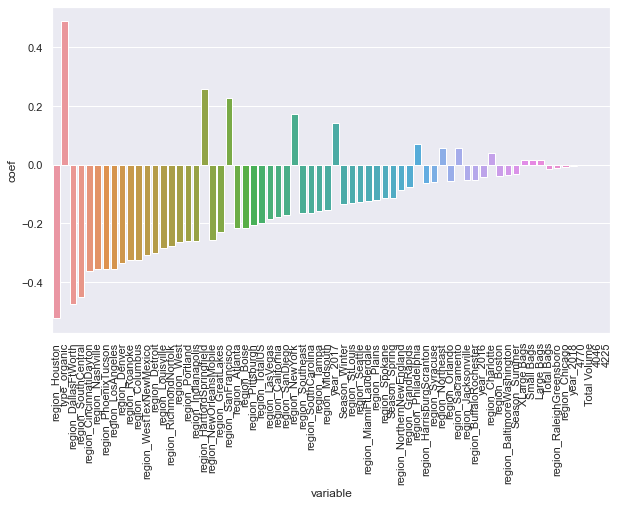

In [184]:
view_coeff(X, ls)

#### refit the model using the alpha from cross validation

In [154]:
ls2=Lasso(alpha=3.0367711180354605e-06, normalize=True)
ls2.fit(X_train,y_train)
ylpred2=ls2.predict(X_test)
print('mean_squared_error:',mean_squared_error(y_test, ylpred2))
print('Test score:',ls2.score(X_test,y_test))

mean_squared_error: 0.06458447317311007
Test score: 0.6098283500703123
